We can check similarity in vector space, using:
* Euclidean distance
* Cosine similarity

## Cosine Similarity:
* It measures the similarity between two vectors of an inner product space.
* It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction.
* It is often used to measure document similarity in text analysis and it is also used in recommendation systems.
* The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

* When plotted on a multi-dimensional space, where each dimension corresponds to a word in the document, the cosine similarity captures the orientation (the angle) of the documents and not the magnitude. If we want the magnitude, we can compute the Euclidean distance instead.
* We can also calculate cosine distance using:

        1- cosine_similarity = cosine_distance

### Example:
* Let’s suppose we have 3 documents based on a couple of star cricket players – Sachin Tendulkar and Dhoni. Two of the documents (A) and (B) are from the wikipedia pages on the respective players and the third document (C) is a smaller snippet from Dhoni’s wikipedia page.
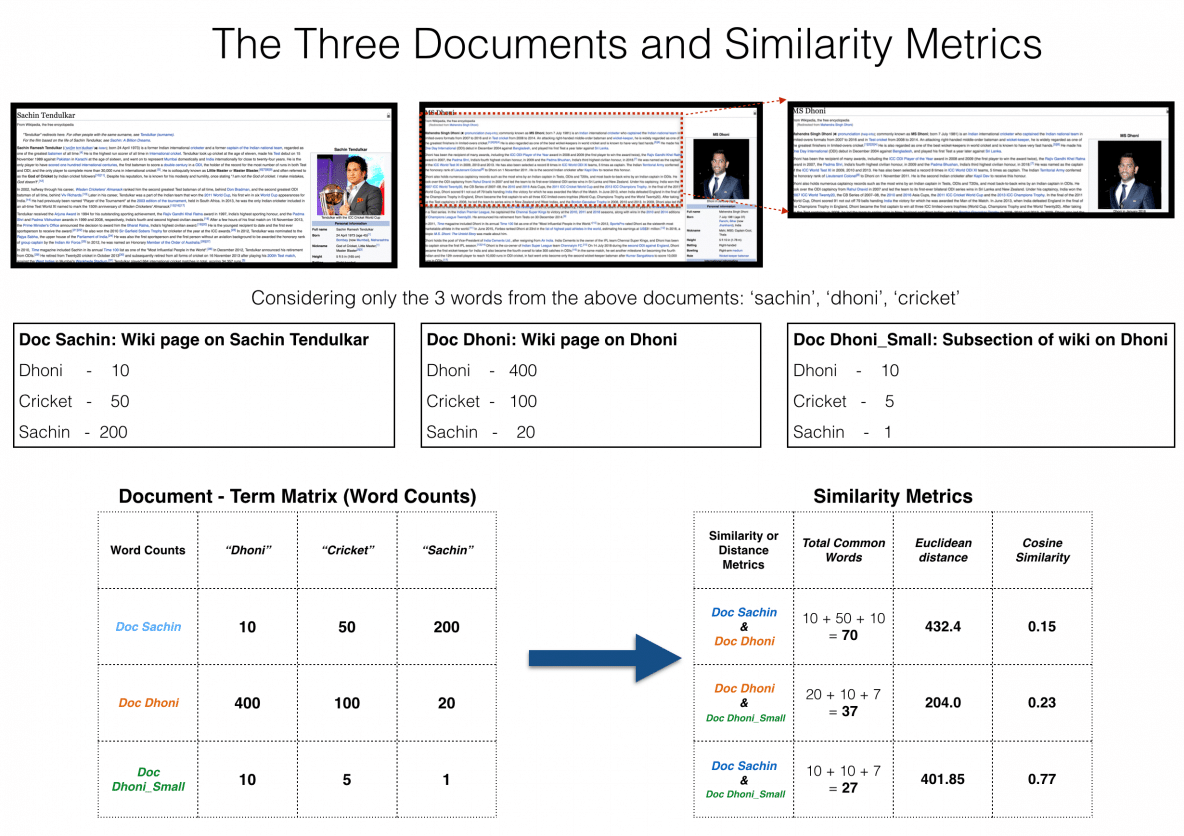

* Here our objective is to quantitatively estimate the similarity between the documents.
* For ease of understanding, let’s consider only the top 3 common words between the documents: ‘Dhoni’, ‘Sachin’ and ‘Cricket’.
* We would expect Doc B and Doc C, that is the two documents on Dhoni would have a higher similarity over Doc A and Doc B, because, Doc C is essentially a snippet from Doc B itself.
* However, if we go by the number of common words, the two larger documents will have the most common words and therefore will be judged as most similar, which is exactly what we want to avoid.
* Let’s project the documents in a 3-dimensional space, where each dimension is a frequency count of either: ‘Sachin’, ‘Dhoni’ or ‘Cricket’. When plotted on this space, the 3 documents would appear something like this.

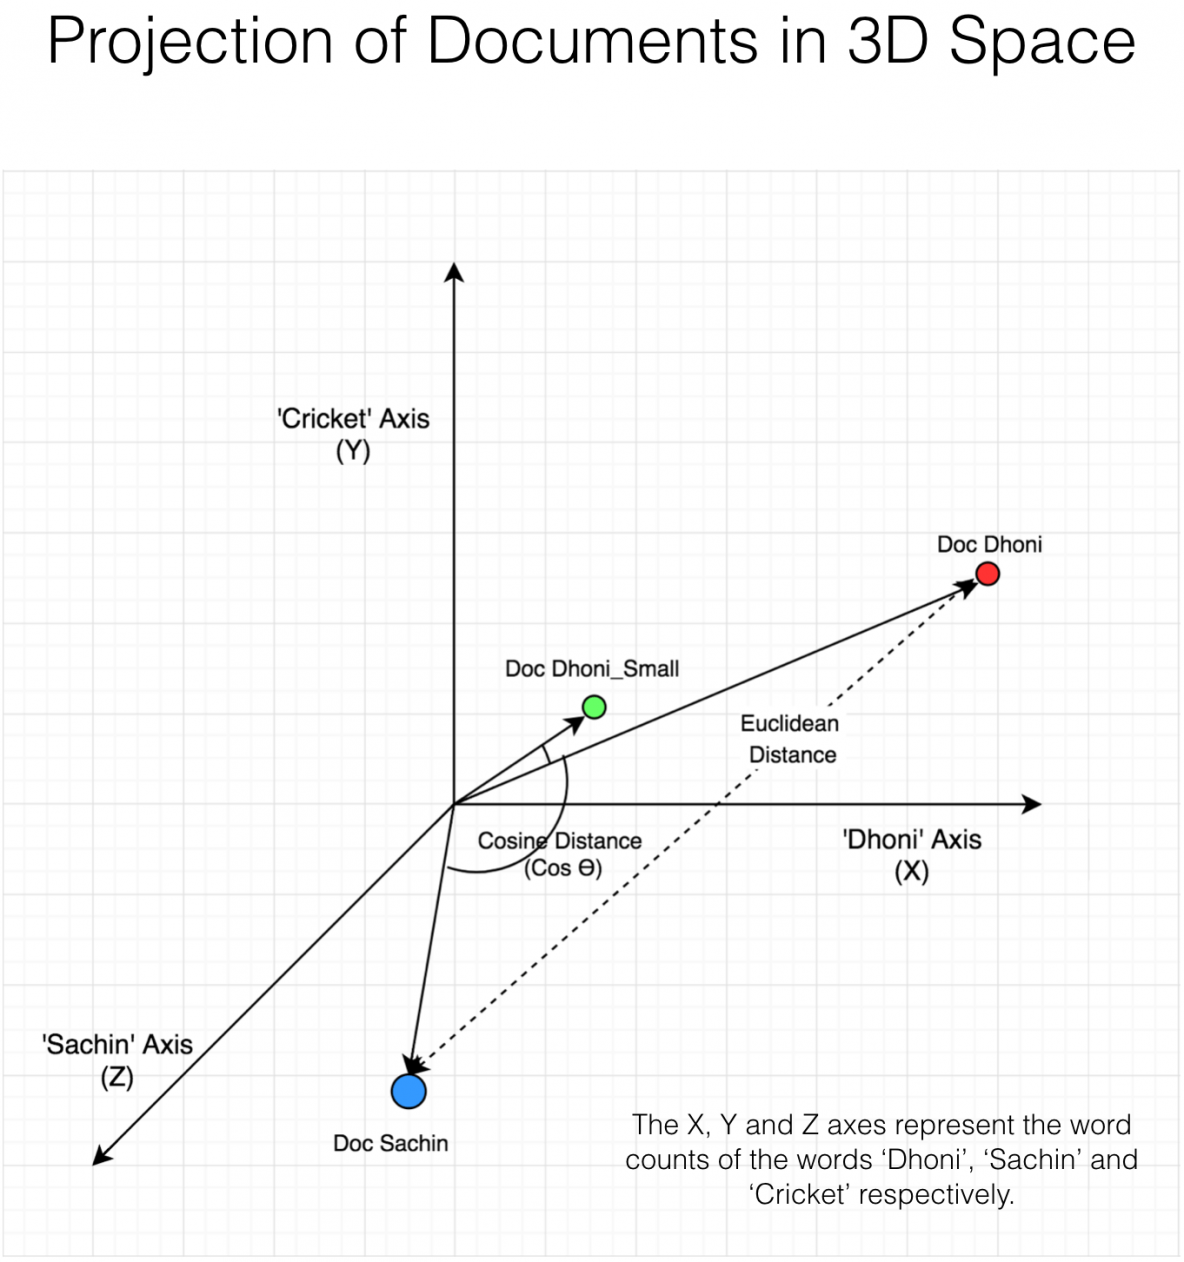

* As we can see, Doc Dhoni_Small and the main Doc Dhoni are oriented closer together in 3-D space, even though they are far apart by magnitiude.
* It turns out, the closer the documents are by angle, the higher is the Cosine Similarity (Cos theta).
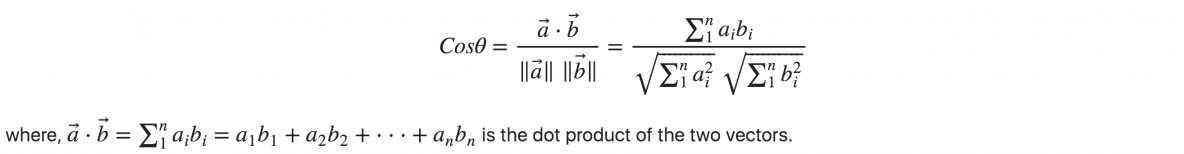

* As we include more words from the document, it’s harder to visualize a higher dimensional space. But we can directly compute the cosine similarity using this math formula.

In [1]:
doc1 = "Elon Reeve Musk is an entrepreneur and business magnate. He is the founder, CEO, and Chief Engineer at SpaceX; early stage investor, CEO, and Product Architect of Tesla, Inc.; founder of The Boring Company; and co-founder of Neuralink and OpenAI. A centibillionaire, Musk is one of the richest people in the world. Musk was born to a Canadian mother and South African father and raised in Pretoria, South Africa. He briefly attended the University of Pretoria before moving to Canada aged 17 to attend Queen's University. He transferred to the University of Pennsylvania two years later, where he received bachelor's degrees in economics and physics."
doc2 = "Jeffrey Preston Bezos is an American business magnate, media proprietor, and investor. Bezos is the founder and executive chairman of Amazon, having previously served as chairman, president and CEO of the company. With a net worth of more than $200 billion as of June 2021, he is the richest person in the world according to both Forbes and Bloomberg's Billionaires Index. Born in Albuquerque and raised in Houston and later Miami, Bezos graduated from Princeton University in 1986. He holds a degree in electrical engineering and computer science."
doc3 = "Elon Reeve Musk was born on June 28, 1971, in Pretoria, South Africa. His mother is Maye Musk (née Haldeman), a model and dietitian born in Saskatchewan, Canada, but raised in South Africa. His father is Errol Musk, a South African electromechanical engineer, pilot, sailor, consultant, and property developer.Musk has a younger brother, Kimbal (born 1972), and a younger sister, Tosca (born 1974).His maternal grandfather, Joshua Haldeman, was an American-born Canadian, and Musk has British and Pennsylvania Dutch ancestry. After his parents divorced in 1980, Musk mostly lived with his father in Pretoria and elsewhere, a choice he made two years after the divorce and subsequently regretted. Musk has become estranged from his father, whom he describes as a terrible human being."
documents = [doc1, doc2, doc3]

**CountVectorizer**: It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

So here to compute the cosine similarity, we need the word count of the words in each document. The CountVectorizer or the TfidfVectorizer from scikit learn lets us compute this. The output of this comes as a sparse_matrix.

In [2]:
# Importing required libraries
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(stop_words="english")
sparse_matrix = count_vectorizer.fit_transform(documents)
sparse_matrix

<3x129 sparse matrix of type '<class 'numpy.int64'>'
	with 159 stored elements in Compressed Sparse Row format>

In [3]:
# We can also convert this matrix to DF for displaying purpose
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['doc1', 'doc2', 'doc_3'])
df

,17,1971,1972,1974,1980,1986,200,2021,28,according,...,subsequently,terrible,tesla,tosca,transferred,university,world,worth,years,younger
doc1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,3,1,0,1,0
doc2,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,1,1,1,0,0
doc_3,0,1,1,1,1,0,0,0,1,0,...,1,1,0,1,0,0,0,0,1,2


If we would have used the TfidfVectorizer() instead of CountVectorizer(), it would have also downweighted words that occur frequently across docuemnts. That would have been better.

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
# Computing Cosine Similarity
print(cosine_similarity(df, df))

[[1.         0.23804761 0.44008054]
 [0.23804761 1.         0.0821648 ]
 [0.44008054 0.0821648  1.        ]]


Here we can see doc 1 & doc 3 are more related compared to doc 2 & doc 3 or doc 1 & doc 2.